In [1]:
import pandas as pd

data = pd.read_csv("puchkov.k@phystech.edu.csv", header=None)

В выборке содержится три столбца $(f, c_1, c_2)$.

Во всех следующих заданиях будем рассматривать линейную модель, определяющую переменную $f$ через номинальные переменные $C_1$ и $C_2$ и их межфакторное взаимодействие. 

In [2]:
data.describe()

,0,1,2
count,1000.000000,1000.000000,1000.00000
mean,0.941494,2.932000,3.01000
std,1.189730,1.999844,1.00045
min,-2.455640,1.000000,2.00000
25%,0.174071,1.000000,2.00000
50%,0.969675,1.000000,4.00000
75%,1.747688,5.000000,4.00000
max,4.388155,5.000000,4.00000


In [3]:
data.sample(5)

,0,1,2
873,0.027361,5.0,4.0
364,2.396814,5.0,2.0
414,1.850299,5.0,4.0
25,1.505322,5.0,4.0
639,0.133514,1.0,2.0


In [4]:
data.columns=['f', "C1", "C2"]

In [5]:
data.sample(5)

,f,C1,C2
467,2.414436,5.0,4.0
423,0.994475,1.0,2.0
551,2.545323,5.0,4.0
148,1.978050,5.0,4.0
61,0.728206,5.0,4.0


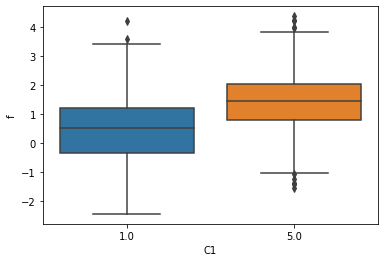

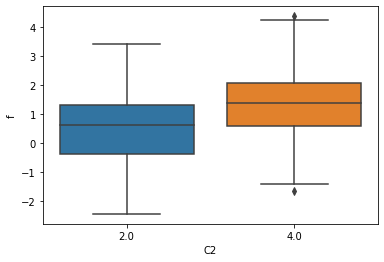

In [6]:
import seaborn as sns
import matplotlib.pylab as plt

sns.boxplot(x='C1', y='f', data=data)
plt.show()

sns.boxplot(x='C2', y='f', data=data)
plt.show()

In [7]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

lm = ols('f ~ C(C1) * C(C2)', data=data).fit()
table = sm.stats.anova_lm(lm, typ=1)
table.round(3)

,df,sum_sq,mean_sq,F,PR(>F)
C(C1),1.0,217.742,217.742,216.282,0.000
C(C2),1.0,193.531,193.531,192.233,0.000
C(C1):C(C2),1.0,0.044,0.044,0.044,0.834
Residual,996.0,1002.725,1.007,NaN,NaN


**Правило: взаимодействие есть, если $PR < 0.05$.**

## Проверить с использованием двухфакторного дисперсионного анализа, влияет ли переменная $C1$ на переменную $f$ в данной линейной модели?

In [113]:
table['PR(>F)'][0] < 0.05

True

## Проверить с использованием двухфакторного дисперсионного анализа, влияет ли переменная $C2$ на переменную $f$ в данной линейной модели?

In [114]:
table['PR(>F)'][1] < 0.05

True

## Проверить с использованием двухфакторного дисперсионного анализа, влияет ли межфакторное взаимодействие на переменную $f$ в данной линейной модели?

In [115]:
table['PR(>F)'][2] < 0.05

False

## Дополнительное задание

В рамках ежегодного аудита проводятся опросы компаний. Опросы включают информацию о количестве работников компании, среднему возрасту работников компании, а также среднему доходу компании за год. Члены аудита решили проверить гипотезу о том, что средний возраст работников влияет на средний доход компании. 

В качестве данных рассмотреть синтетическую выборку: доход компании — нормально распределение с $mean=10^{10}$, $std=10^9$; в качестве среднего возраста выбрать нормальное с параметрами $mean=35$, $std=10$; в качестве количества работников выбрать равномерное распределение (над целыми числами) от $1000$ до $2000$. Всего сгенерировать $50$ объектов.

In [9]:
import numpy as np

np.random.seed(42)
profit = np.random.normal(10**10, 10**9, 50)
age = np.random.normal(35, 10, 50)
amount = np.random.uniform(1000, 2000, 50)

d = {"profit": profit, "age": age, "amount": amount}
df = pd.DataFrame(data=d, dtype=np.float64)
df.describe()

,profit,age,amount
count,5.000000e+01,50.000000,50.000000
mean,9.774526e+09,35.177809,1454.888648
std,9.336688e+08,8.743250,282.341863
min,8.040330e+09,8.802549,1016.587829
25%,9.139021e+09,30.038887,1238.118631
50%,9.765855e+09,35.460803,1402.073175
75%,1.033628e+10,40.870741,1665.394858
max,1.185228e+10,50.646437,1985.650454


In [10]:
df.sample(5)

,profit,age,amount
33,8.942289e+09,29.817298,1535.774684
9,1.054256e+10,44.755451,1971.782083
42,9.884352e+09,27.979469,1512.093058
12,1.024196e+10,23.936650,1497.248506
20,1.146565e+10,38.613956,1908.265886


In [12]:
formula = ols('profit ~ age', data=df).fit()
impact = sm.stats.anova_lm(formula, typ=1)
impact['PR(>F)'].round(3)

age         0.447
Residual      NaN
Name: PR(>F), dtype: float64

$0.447 > 0.05$, следовательно, средний возраст работников не влияет на средний доход компании.